In [1]:
from ipca import IncrementalPCA
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data import 

In [2]:
data_file_path = "../data/wmf-up-n-down.csv"
df = pd.read_csv(data_file_path)
df.columns = ["time", "aX", "aY", "aZ", "gX", "gY", "gZ"]
df.time = df.time - df.time.min()
df

,time,aX,aY,aZ,gX,gY,gZ
0,0,0.123535,0.573730,0.810059,3.845215,1.708984,-4.699707
1,10,0.130859,0.568359,0.813477,3.356934,1.403809,-4.638672
2,20,0.120605,0.578613,0.809570,3.234863,1.159668,-4.699707
3,30,0.107422,0.589844,0.816406,2.929688,0.671387,-4.577637
4,40,0.104004,0.576660,0.825195,2.136230,-0.183105,-4.150391
...,...,...,...,...,...,...,...
9059,101850,0.175781,0.547363,0.817383,-1.220703,-2.807617,-3.112793
9060,101870,0.168945,0.546875,0.821289,-1.220703,-2.502441,-3.295898
9061,101890,0.173340,0.550293,0.814941,-1.525879,-2.746582,-2.929688
9062,101900,0.177734,0.551758,0.815918,-1.708984,-2.807617,-2.990723


In [3]:
df.loc[:,["aX", "aY", "aZ"]] = df.loc[:,["aX", "aY", "aZ"]] * 9.8
M = df.loc[:, ["aX", "aY", "aZ"]].values

# PCA

In [4]:
df.loc[:,["pca0", "pca1", "pca2"]] = PCA().fit_transform(df.loc[:,["aX", "aY", "aZ"]])

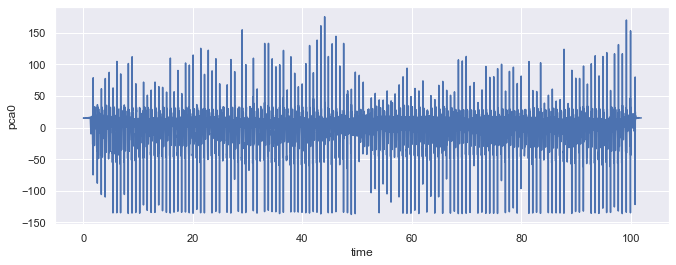

In [5]:
sns.lineplot(x=df.time / 1000, y=df.pca0)
plt.show()

# Incremental PCA

In [6]:
ipca = IncrementalPCA(300)
ipca_results = pd.DataFrame(ipca.fit_transform(M), columns=["pca0", "pca1", "pca2"])

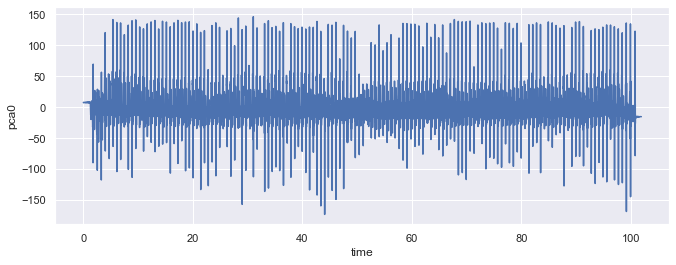

In [7]:
sns.lineplot(x=df.time / 1000, y=ipca_results.pca0)
plt.show()

# Comparison

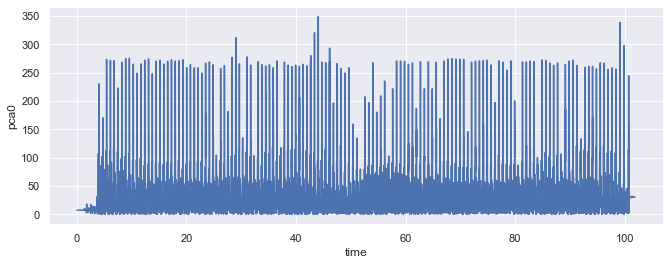

In [8]:
sns.lineplot(x=df.time/1000, y=np.abs(df.pca0 - ipca_results.pca0))
plt.show()

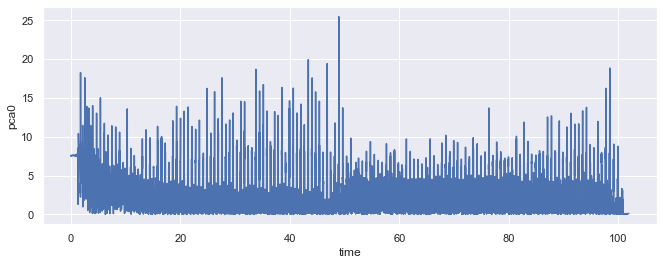

In [9]:
sns.lineplot(x=df.time/1000, y=np.abs(df.pca0.abs() - ipca_results.pca0.abs()))
plt.show()

In [10]:
(df.pca0.abs() - ipca_results.pca0.abs()).mean()

0.6296215594987085